# Лабораторна робота №2 - Bagging

## Підготовка середовища

1. Імпорти залежностей

In [1]:
import torch
import random
import numpy as np
import pandas as pd

from src.visualization.plot import plot_estimators_count_to_f1
from src.util.torch_device import resolve_torch_device

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.discriminant_analysis import StandardScaler

2. Встановити сід генератора випадкових чисел

In [2]:
random_seed = 42

random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)

3. Завантажити девайс

In [3]:
device = resolve_torch_device()

4. Завантажити датасет

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
df = df.dropna()

x = df.drop(columns=["num"]).to_numpy()
y = df["num"].to_numpy()

## Навчання SVM.

1. Завантажити та налаштувати модель обраної архітектури

In [5]:
pipe = make_pipeline(
    StandardScaler(),
    SVC(random_state=random_seed),
)

2. Провести навчання моделі

In [6]:
svm_score = cross_val_score(pipe, x, y, scoring="f1_weighted").mean()

## Навчання MLP.

1. Завантажити та налаштувати модель обраної архітектури

In [7]:
pipe = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=[512],
        random_state=random_seed,
        learning_rate_init=0.001,
        max_iter=1000,
    ),
)

2. Провести навчання моделі

In [8]:
mlp_score = cross_val_score(pipe, x, y, scoring="f1_weighted").mean()

## Навчання Bagging SVM.

1. Завантажити та налаштувати модель обраної архітектури

In [9]:
pipe = make_pipeline(
    StandardScaler(),
    BaggingClassifier(estimator=SVC(), n_estimators=1, random_state=random_seed),
)

2. Провести навчання моделі

In [10]:
param_grid = {
    "baggingclassifier__n_estimators": np.arange(2, 20, 1),
}

search = GridSearchCV(pipe, param_grid, scoring="f1_weighted", verbose=10)

search.fit(x, y)

used_params = [
    it["baggingclassifier__n_estimators"] for it in search.cv_results_["params"]
]

best_bagging_svm = search.best_estimator_
bagging_svm_score = search.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START baggingclassifier__n_estimators=2..........................
[CV 1/5; 1/18] END baggingclassifier__n_estimators=2;, score=0.498 total time=   0.0s
[CV 2/5; 1/18] START baggingclassifier__n_estimators=2..........................
[CV 2/5; 1/18] END baggingclassifier__n_estimators=2;, score=0.516 total time=   0.0s
[CV 3/5; 1/18] START baggingclassifier__n_estimators=2..........................
[CV 3/5; 1/18] END baggingclassifier__n_estimators=2;, score=0.522 total time=   0.0s
[CV 4/5; 1/18] START baggingclassifier__n_estimators=2..........................
[CV 4/5; 1/18] END baggingclassifier__n_estimators=2;, score=0.519 total time=   0.0s
[CV 5/5; 1/18] START baggingclassifier__n_estimators=2..........................
[CV 5/5; 1/18] END baggingclassifier__n_estimators=2;, score=0.476 total time=   0.0s
[CV 1/5; 2/18] START baggingclassifier__n_estimators=3..........................
[CV 1/5; 2/18] END bagg

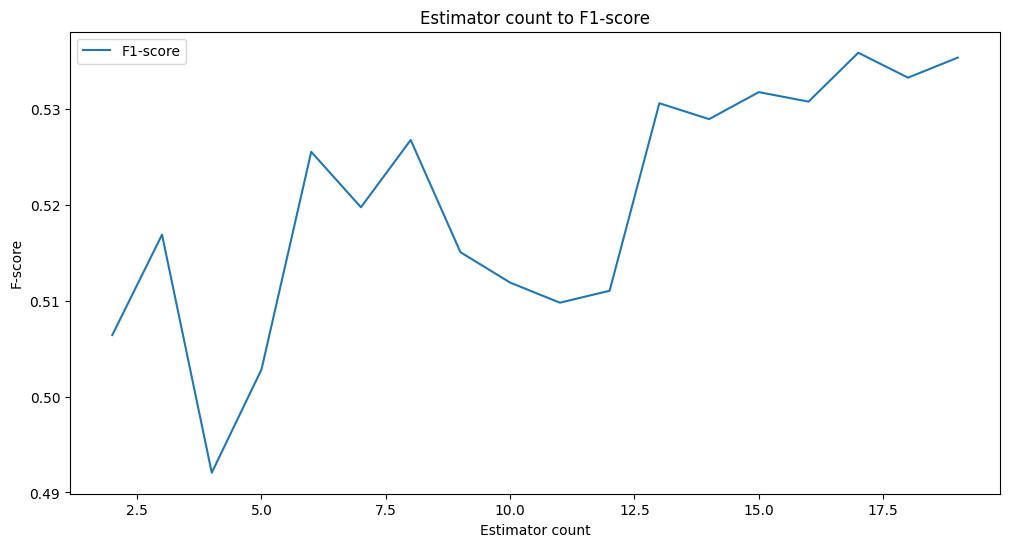

In [11]:
plot_estimators_count_to_f1(used_params, search.cv_results_["mean_test_score"])

## Навчання Bagging MLP.

1. Завантажити та налаштувати модель обраної архітектури

In [12]:
pipe = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        estimator=MLPClassifier(
            hidden_layer_sizes=[512],
            random_state=random_seed,
            learning_rate_init=0.001,
            max_iter=1000,
        ),
        n_estimators=1, 
        random_state=random_seed
    )
)

2. Провести навчання моделі

In [13]:
param_grid = {
    "baggingclassifier__n_estimators": np.arange(5, 12, 1),
}

search = GridSearchCV(pipe, param_grid, scoring="f1_weighted", verbose=10)

search.fit(x, y)

used_params = [
    it["baggingclassifier__n_estimators"] for it in search.cv_results_["params"]
]

best_bagging_mlp = search.best_estimator_
bagging_mlp_score = search.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START baggingclassifier__n_estimators=5...........................
[CV 1/5; 1/7] END baggingclassifier__n_estimators=5;, score=0.628 total time=   5.1s
[CV 2/5; 1/7] START baggingclassifier__n_estimators=5...........................
[CV 2/5; 1/7] END baggingclassifier__n_estimators=5;, score=0.542 total time=   3.8s
[CV 3/5; 1/7] START baggingclassifier__n_estimators=5...........................
[CV 3/5; 1/7] END baggingclassifier__n_estimators=5;, score=0.555 total time=   4.0s
[CV 4/5; 1/7] START baggingclassifier__n_estimators=5...........................
[CV 4/5; 1/7] END baggingclassifier__n_estimators=5;, score=0.535 total time=   3.8s
[CV 5/5; 1/7] START baggingclassifier__n_estimators=5...........................
[CV 5/5; 1/7] END baggingclassifier__n_estimators=5;, score=0.510 total time=   3.9s
[CV 1/5; 2/7] START baggingclassifier__n_estimators=6...........................
[CV 1/5; 2/7] END baggingclas

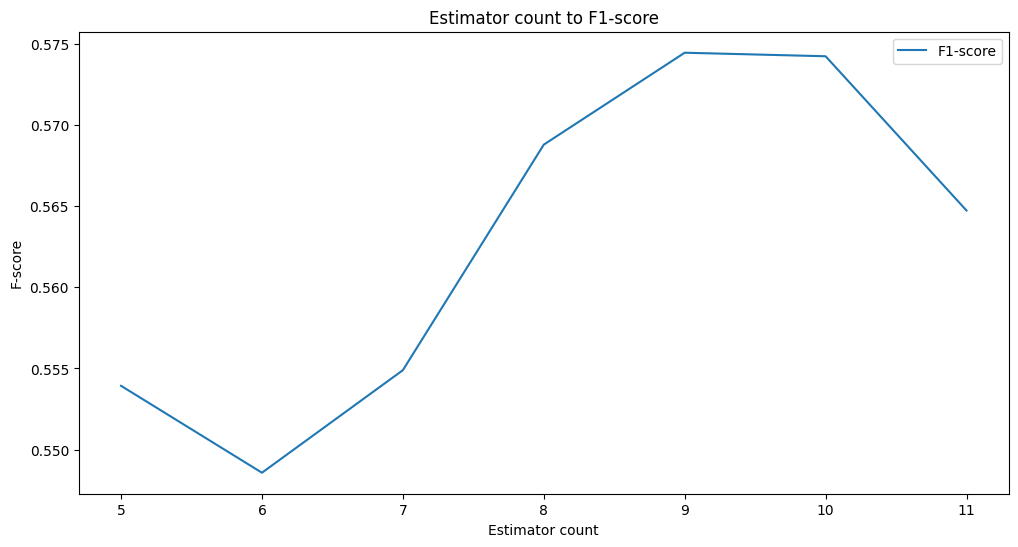

In [14]:
plot_estimators_count_to_f1(used_params, search.cv_results_["mean_test_score"])

## Навчання bagging SVM + MLP.

1. Завантажити та налаштувати модель обраної архітектури

In [15]:
stack = StackingClassifier(estimators=[("svm", best_bagging_svm), ("mlp", best_bagging_mlp)])

2. Провести навчання моделі

In [16]:
bagging_svm_mlp_score = cross_val_score(stack, x, y, scoring="f1_weighted").mean()

## Висновки

In [17]:
data = {
    "Модель": ["SVM", "MLP", "Bagging SVM", "Bagging MLP", "Bagging SVM + MLP"],
    "F1 score": [
        svm_score,
        mlp_score,
        bagging_svm_score,
        bagging_mlp_score,
        bagging_svm_mlp_score,
    ],
}

df = pd.DataFrame(data)

df

,Модель,F1 score
0,SVM,0.505928
1,MLP,0.569876
2,Bagging SVM,0.535847
3,Bagging MLP,0.574467
4,Bagging SVM + MLP,0.549654
